# Figures for Dussin, *in prep* 

## **Four generations of ECMWF reanalyses: an overview of the successes in modeling precipitation and remaining challenges for freshwater budget of ocean models.**

## 1. Net and latent heat fluxes (Figure 11)

<Figure size 640x480 with 0 Axes>

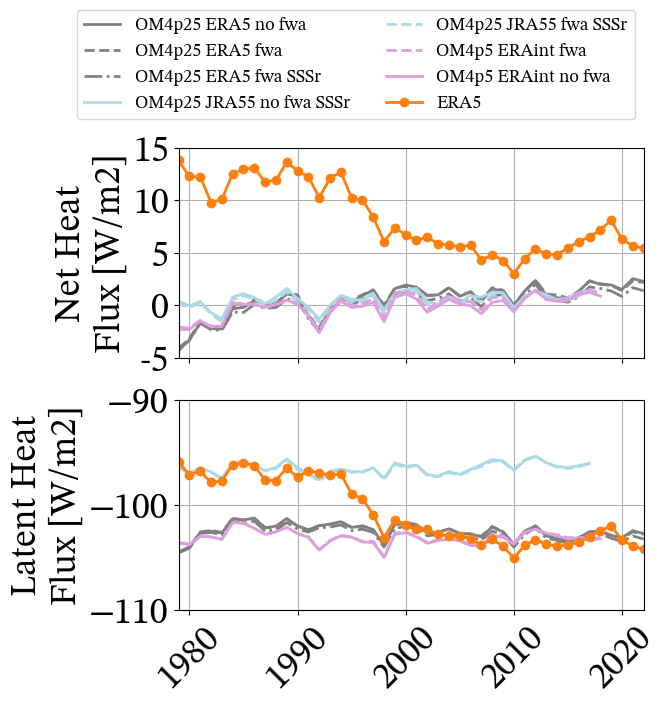

In [1]:
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

use_stix = True

if use_stix:
    # replace with your own copy
    dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
    import matplotlib.font_manager as font_manager
    for font in font_manager.findSystemFonts(dirstix):
        font_manager.fontManager.addfont(font)
    # Set font family globally
    plt.rcParams['font.family'] = 'STIX Two Text'

# load data
ts_era5 = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_ERA5.nc")
ts_nofw = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_ERA5_nofw.nc")
ts_fw = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_ERA5_fw.nc")
ts_fw_rest = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_ERA_fw_rest.nc")
ts_jra_nofw = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_JRA55_nofw.nc")
ts_jra_fw = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_JRA55_fw.nc")
ts_eraint_fw = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_ERAint_fw.nc")
ts_eraint_nofw = xr.open_dataset("data_Dussin_Precips_ECMWF/timeserie_fluxes_run_ERAint_nofw.nc")

ts_eraint_fw["time"] = xr.DataArray(np.arange(1979, 2018+1), dims="time")
ts_eraint_nofw["time"] = xr.DataArray(np.arange(1979, 2018+1), dims="time")

# plot
plt.rcParams.update({"font.size": 26})
kwargs=dict(linewidth=2)
plt.figure()
f, axs = plt.subplots(nrows=2, figsize=[6,6])
ts_nofw["net"].plot(ax=axs[0], color="grey", linestyle="-", label="OM4p25 ERA5 no fwa", **kwargs)
ts_fw["net"].plot(ax=axs[0], color="grey", linestyle="--", label="OM4p25 ERA5 fwa", **kwargs)
ts_fw_rest["net"].plot(ax=axs[0], color="grey", linestyle="-.", label="OM4p25 ERA5 fwa SSSr", **kwargs)
ts_jra_nofw["net"].plot(ax=axs[0], color="lightblue", linestyle="-", label="OM4p25 JRA55 no fwa SSSr", **kwargs)
ts_jra_fw["net"].plot(ax=axs[0], color="lightblue", linestyle="--",  label="OM4p25 JRA55 fwa SSSr", **kwargs)
ts_eraint_fw["ave_hfds"].plot(ax=axs[0], color="plum", linestyle="--",  label="OM4p5 ERAint fwa", **kwargs)
ts_eraint_nofw["ave_hfds"].plot(ax=axs[0], color="plum", linestyle="-",  label="OM4p5 ERAint no fwa", **kwargs)
ts_era5["net"].plot(ax=axs[0], color="tab:orange", marker="o", label="ERA5", **kwargs)
axs[0].set_xlim([1979,2022])
axs[0].set_ylim([-5,15])
axs[0].grid()
axs[0].set_xlabel("")
axs[0].set_ylabel("Net Heat\nFlux [W/m2]")
axs[0].set_xticks([1980,1990,2000,2010,2020], 
           ["", "", "", "", ""])
axs[0].set_yticks([-5,0,5,10, 15], 
           [-5,0,5,10,15])

axs[0].legend(bbox_to_anchor=[0.8, 1.5, 0.2, 0.2], fontsize=13, frameon=True, ncols=2)
ts_nofw["latent"].plot(ax=axs[1], color="grey", linestyle="-", **kwargs)
ts_fw["latent"].plot(ax=axs[1], color="grey", linestyle="--", **kwargs)
ts_fw_rest["latent"].plot(ax=axs[1], color="grey", linestyle="-.", **kwargs)
ts_jra_nofw["latent"].plot(ax=axs[1], color="lightblue", linestyle="-", **kwargs)
ts_jra_fw["latent"].plot(ax=axs[1], color="lightblue", linestyle="--", **kwargs)
ts_eraint_fw["ave_hflso"].plot(ax=axs[1], color="plum", linestyle="--",  label="OM4p5 ERAint fwa", **kwargs)
ts_eraint_nofw["ave_hflso"].plot(ax=axs[1], color="plum", linestyle="-",  label="OM4p5 ERAint no fwa", **kwargs)
ts_era5["latent"].plot(ax=axs[1], color="tab:orange", marker="o", **kwargs)

axs[1].set_xlim([1979,2022])
axs[1].set_ylim([-110,-90])
axs[1].grid()
axs[1].set_ylabel("Latent Heat\nFlux [W/m2]")
axs[1].set_xticks([1980,1990,2000,2010,2020], 
           ["1980", "1990", "2000", "2010", "2020"], rotation=45)
axs[1].set_xlabel("")
plt.draw()
plt.savefig("fig_net_latent_heat_flux.png", bbox_inches='tight')

In [7]:
print(f"{ts_era5['net'].sel(time=slice(1979, 1994)).mean(dim='time').values:.2f}")
print(f"{ts_era5['net'].sel(time=slice(1998, 2022)).mean(dim='time').values:.2f}")

print(f"{ts_era5['latent'].sel(time=slice(1979, 1994)).mean(dim='time').values:.2f}")
print(f"{ts_era5['latent'].sel(time=slice(1998, 2022)).mean(dim='time').values:.2f}")


12.13
5.68
-96.95
-103.23


In [8]:
-103.23+96.95

-6.280000000000001

## 2. Freshwater balance in the ocean (Figure 12)

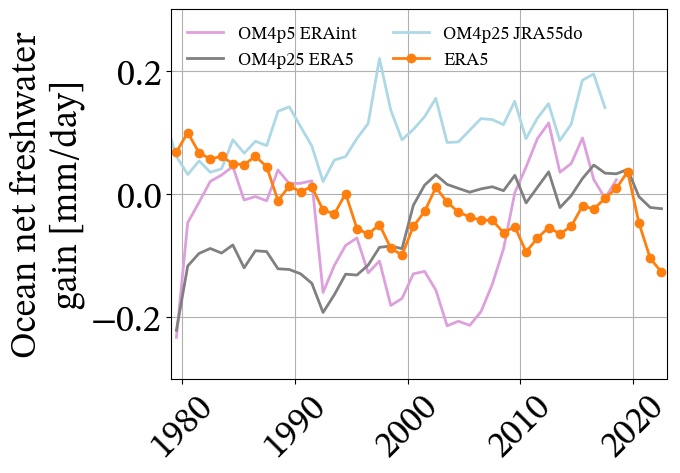

In [2]:
import cftime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

use_stix = True

if use_stix:
    # replace with your own copy
    dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
    import matplotlib.font_manager as font_manager
    for font in font_manager.findSystemFonts(dirstix):
        font_manager.fontManager.addfont(font)
    # Set font family globally
    plt.rcParams['font.family'] = 'STIX Two Text'

# load data
wfo_om4jra55 = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_om4_jra55.nc")["wfo_om4jra55"]
wfo_om4erai = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_om4_erai.nc")["wfo_om4erai"]
wfo_om4era5 = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_om4_era5.nc")["wfo_om4era5"]
wfo_era5 = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_wfo_era5.nc")["wfo_era5"]

#wfo_om4jra55
#wfo_om4erai
#wfo_om4era5
#wfo_era5
#ts_eraint_fw["time"] = xr.DataArray(np.arange(1979, 2018+1), dims="time")

# plot
plt.rcParams.update({"font.size": 26})
ax = plt.axes()

wfo_om4erai.plot(ax=ax, label="OM4p5 ERAint", color="plum", linestyle="-", linewidth=2)
wfo_om4era5.plot(ax=ax, label="OM4p25 ERA5", color="grey", linestyle="-", linewidth=2)
wfo_om4jra55.plot(ax=ax, label="OM4p25 JRA55do", color="lightblue", linestyle="-", linewidth=2)
wfo_era5.plot(ax=ax, label="ERA5", color="tab:orange", marker="o", linewidth=2)

plt.ylabel("Ocean net freshwater\ngain [mm/day]")
plt.xlabel("")

plt.xticks([cftime.DatetimeNoLeap(1960,1,1),
            cftime.DatetimeNoLeap(1970,1,1),
            cftime.DatetimeNoLeap(1980,1,1),
            cftime.DatetimeNoLeap(1990,1,1),
            cftime.DatetimeNoLeap(2000,1,1),
            cftime.DatetimeNoLeap(2010,1,1),
            cftime.DatetimeNoLeap(2020,1,1),], 
           ["1960", "1970","1980", "1990", "2000", "2010", "2020"], rotation=45)

plt.xlim([cftime.DatetimeNoLeap(1979,1,1), cftime.DatetimeNoLeap(2023,1,1)])
plt.ylim([-0.3, 0.3])
plt.grid()
plt.legend(fontsize=13, ncols=2, frameon=False)
plt.draw()
plt.savefig("fig_net_freshwater.png", bbox_inches="tight")

## 3. Evaporation in OM4 experiments compared to Flux products (Figure 13)

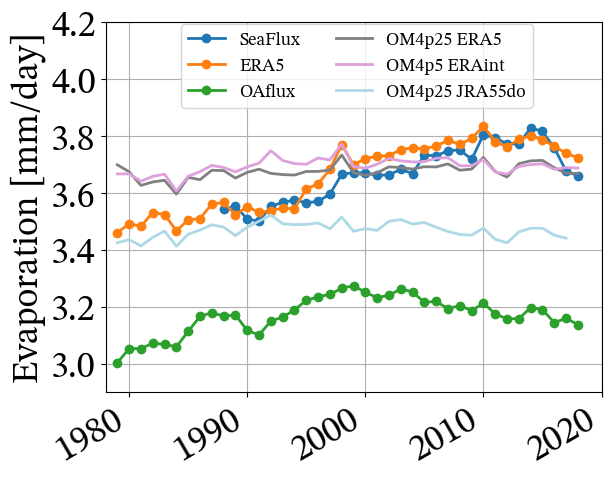

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

use_stix = True

if use_stix:
    # replace with your own copy
    dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
    import matplotlib.font_manager as font_manager
    for font in font_manager.findSystemFonts(dirstix):
        font_manager.fontManager.addfont(font)
    # Set font family globally
    plt.rcParams['font.family'] = 'STIX Two Text'

# load data
evap_plt = xr.open_dataset("data_Dussin_Precips_ECMWF/ts_evap_compare_grd_oaflux_1deg+era+jra.nc")

# plot
plt.rcParams.update({"font.size": 26})
plt.figure()
ax = plt.axes()
kwargs=dict(yincrease=True, linewidth=2)

pltime = evap_plt["time"] - np.timedelta64(364, 'D')
evap_plt["time"] = pltime

evap_plt["seaflux"].plot(ax=ax, label="SeaFlux", color="tab:blue", marker="o", **kwargs)
evap_plt["era5"].plot(ax=ax, label="ERA5", color="tab:orange", marker="o", **kwargs)
evap_plt["oaflux"].plot(ax=ax, label="OAflux", color="tab:green", marker="o", **kwargs)
evap_plt["om4_adjustrest"].plot(ax=ax, label="OM4p25 ERA5",color="grey", linestyle="-", **kwargs)
evap_plt["erai_adjusted"].plot(ax=ax, label="OM4p5 ERAint", color="plum", linestyle="-", **kwargs)
evap_plt["jra_c6"].plot(ax=ax, label="OM4p25 JRA55do", color="lightblue", linestyle="-", **kwargs)

plt.xticks([np.datetime64("1980-01-01"),
            np.datetime64("1990-01-01"),
            np.datetime64("2000-01-01"),
            np.datetime64("2010-01-01"),
            np.datetime64("2020-01-01"),], 
           ["1980", "1990", "2000", "2010", "2020"])
plt.yticks([3.0,3.2,3.4,3.6,3.8,4.0,4.2])

plt.xlabel("")
plt.ylabel("Evaporation [mm/day]")
plt.legend(fontsize=13, ncols=2, bbox_to_anchor=[0.88,1.02], frameon=True)
plt.grid()
plt.xlim([np.datetime64("1978-01-01"), np.datetime64("2020-01-01")])
plt.ylim([2.9, 4.2])
plt.draw()
plt.savefig("fig_evaporation_comparation.png", bbox_inches="tight")